# Assignment 2
By Alexandra de Carvalho and Nuno Pedrosa

## Importing Modules

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Processing
### Constructing a Laplacian matrix to represent the graph 

In [34]:
ego = 0

From the feat file, get an ordered list of the friends / nodes.

In [35]:
with open("facebook/" + str(ego) +".feat") as f:
    friends = []
    for line in f:
        friends += [int(line.split(" ")[0])]

From the edges file, get a list of connections between nodes.

In [36]:
with open("facebook/" + str(ego) +".edges") as f:
    edges = []
    for line in f:
        edges.append(list(map(int, line.strip().split(" "))))

#### Adjacency Matrix

In [82]:
adj_matrix = np.zeros((len(friends), len(friends)))

# now we add the edges from the edges file
for edge in edges:
    adj_matrix[edge[0]-1][edge[1]-1] = 1
    adj_matrix[edge[1]-1][edge[0]-1] = 1

In [54]:
adj_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Degree Matrix

In [55]:
deg_matrix = np.zeros((len(friends), len(friends)))

for row_idx in range(len(adj_matrix)):
    deg_matrix[row_idx][row_idx] = np.count_nonzero(adj_matrix[row_idx] == 1)

#### Laplacian Matrix

In [56]:
lap_matrix = np.subtract(deg_matrix, adj_matrix)
lap_matrix

array([[16.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  0.,  0.],
       [-1.,  0.,  0., ...,  0., 26.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  6.]])

## Decomposition
### Computing eigenvalues and eigenvectors of the matrix 

In [57]:
eigenvals, eigenvects = np.linalg.eigh(lap_matrix)

## Determining the Number of Clusters
### Using the eigengap approach

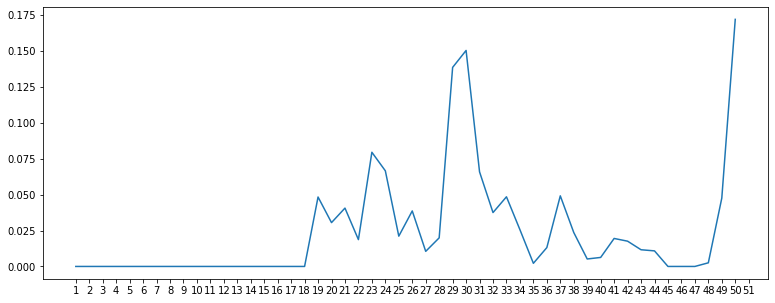

In [85]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(0,51), np.arange(1,52))
ordered_evals = np.argsort(eigenvals)
plt.plot(np.diff([eigenvals[idx] for idx in ordered_evals])[:50])
plt.show()

Based on the figure above, we will choose k = 18.

In [81]:
n = 18

## Clustering
### Grouping points based on the new representation

In [87]:
low_representation = eigenvects[ordered_evals][:,:n]

In [121]:
kmeans = KMeans(n)
kmeans.fit(low_representation)
my_clusters = list(kmeans.labels_)

## Evaluating Results
### Similarity of the resulting clusters to the gold standard

In [119]:
with open("facebook/" + str(ego) +".circles") as f:
    gold_std = np.zeros(len(friends))
    i = 0
    for line in f:
        i+=1
        l = line.split("\t")[1:]
        for friend in l:
            gold_std[int(friend)-1] = i

gold_std = list(gold_std)

In [122]:
for idx in sorted([idx for idx,cluster in enumerate(gold_std) if cluster == 0],reverse=True):
    del my_clusters[idx]
    del gold_std[idx]

In [125]:
adjusted_rand_score(my_clusters, gold_std)

0.0353207521407879

## Weighted Graph